Objective:</br>
Explore how to train, evaluate, and interpret a regression model on real-world data.</br>

**Problem Statement:**</br>
You are given a dataset containing information about housing prices in California. Your task is to build a linear regression model to predict median house value based on selected numerical features.</br>
You can load the dataset directly from `sklearn.datasets`.</br>
Link for the ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html</br>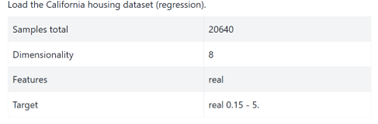

**Instructions:**</br>
Perform the following tasks in your Colab:</br>
1.	Load the California Housing dataset from `sklearn.datasets` into your Python environment using the `fetch_california_housing()` function.</br>
2.	Convert the dataset into a Pandas DataFrame to facilitate exploration and manipulation of the features and target variable.</br>
3.	Perform exploratory data analysis (EDA) by visualizing the distribution of key variables and checking for any correlations using tools like seaborn, matplotlib, and pandas.</br>
4.	From the available features, select only the relevant numerical attributes that are expected to influence the housing price prediction (e.g., average number of rooms, median income).</br>
5.	Divide the dataset into training and testing subsets using `train_test_split()` from `sklearn.model_selection`, typically with an 80-20 split for training and testing respectively.</br>
6.	Initialize and train a Linear Regression model from sklearn.linear_model using the training set's input features and target values.</br>
7.	Evaluate the trained model on the test set using performance metrics such as the R² score and Mean Squared Error (MSE) from sklearn.metrics to quantify prediction accuracy.</br>
8.	Generate a scatter plot comparing predicted versus actual median house values to visually assess the model's prediction capability and identify any patterns or biases.</br>
9.	Interpret the evaluation metrics and comment on the model's strengths and weaknesses, and discuss possible limitations such as linearity assumptions, outliers, or feature multicollinearity.</br>
You may use tools like pandas, numpy, matplotlib, seaborn, sklearn.</br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load dataset
california = fetch_california_housing()

In [ ]:
# Convert to Pandas DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

df.head() # Shows first 5 rows by default

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


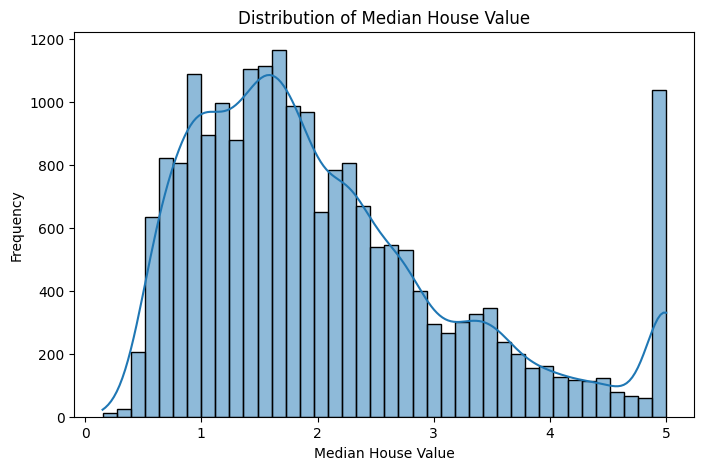

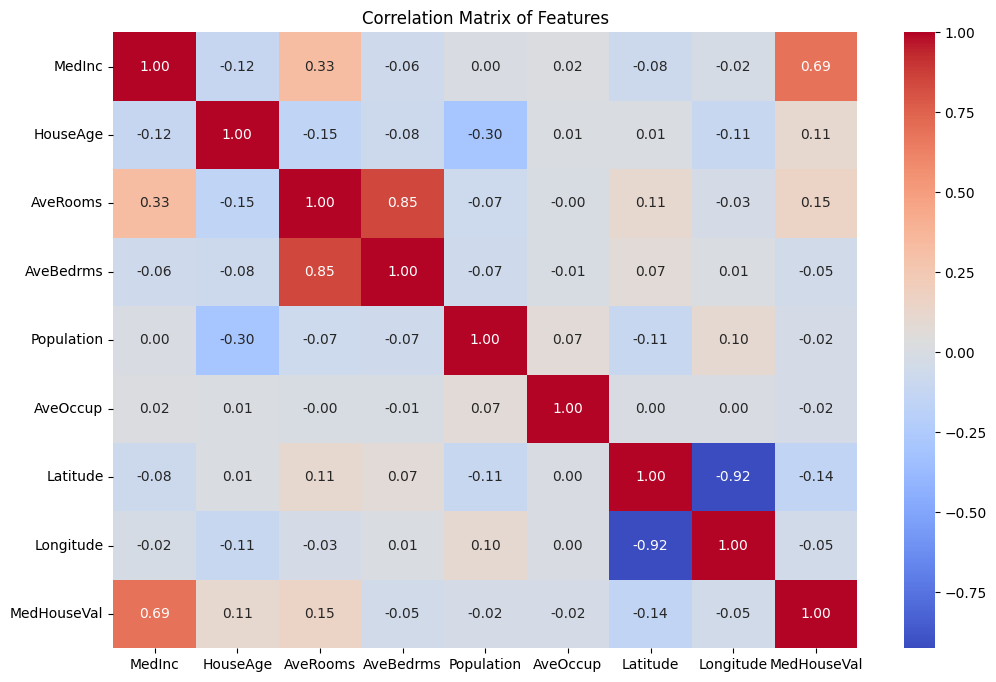

In [ ]:
# Exploratory Data Analysis (EDA)

# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=40)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
# Select relevant numerical features
# Based on correlation matrix, select high-impact features
features = ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']
X = df[features]
y = df['MedHouseVal']

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate Model Performance
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 0.4983
Mean Squared Error: 0.6575


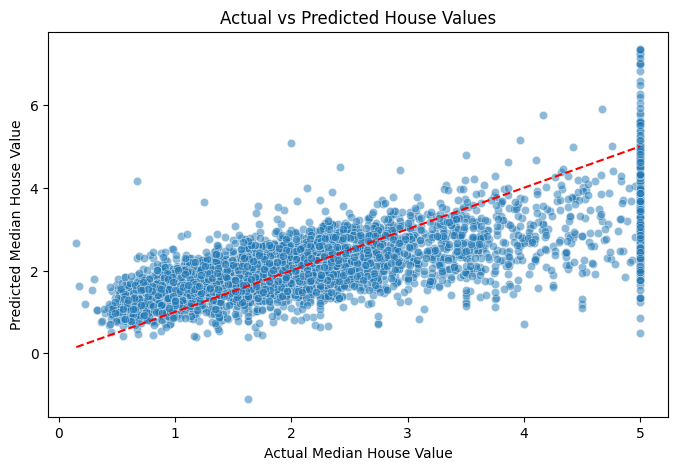

In [ ]:
# Plot Actual vs Predicted Median House Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()